Starting parallel pool (parpool) using the 'Processes' profile ...
Connected to parallel pool with 12 workers.


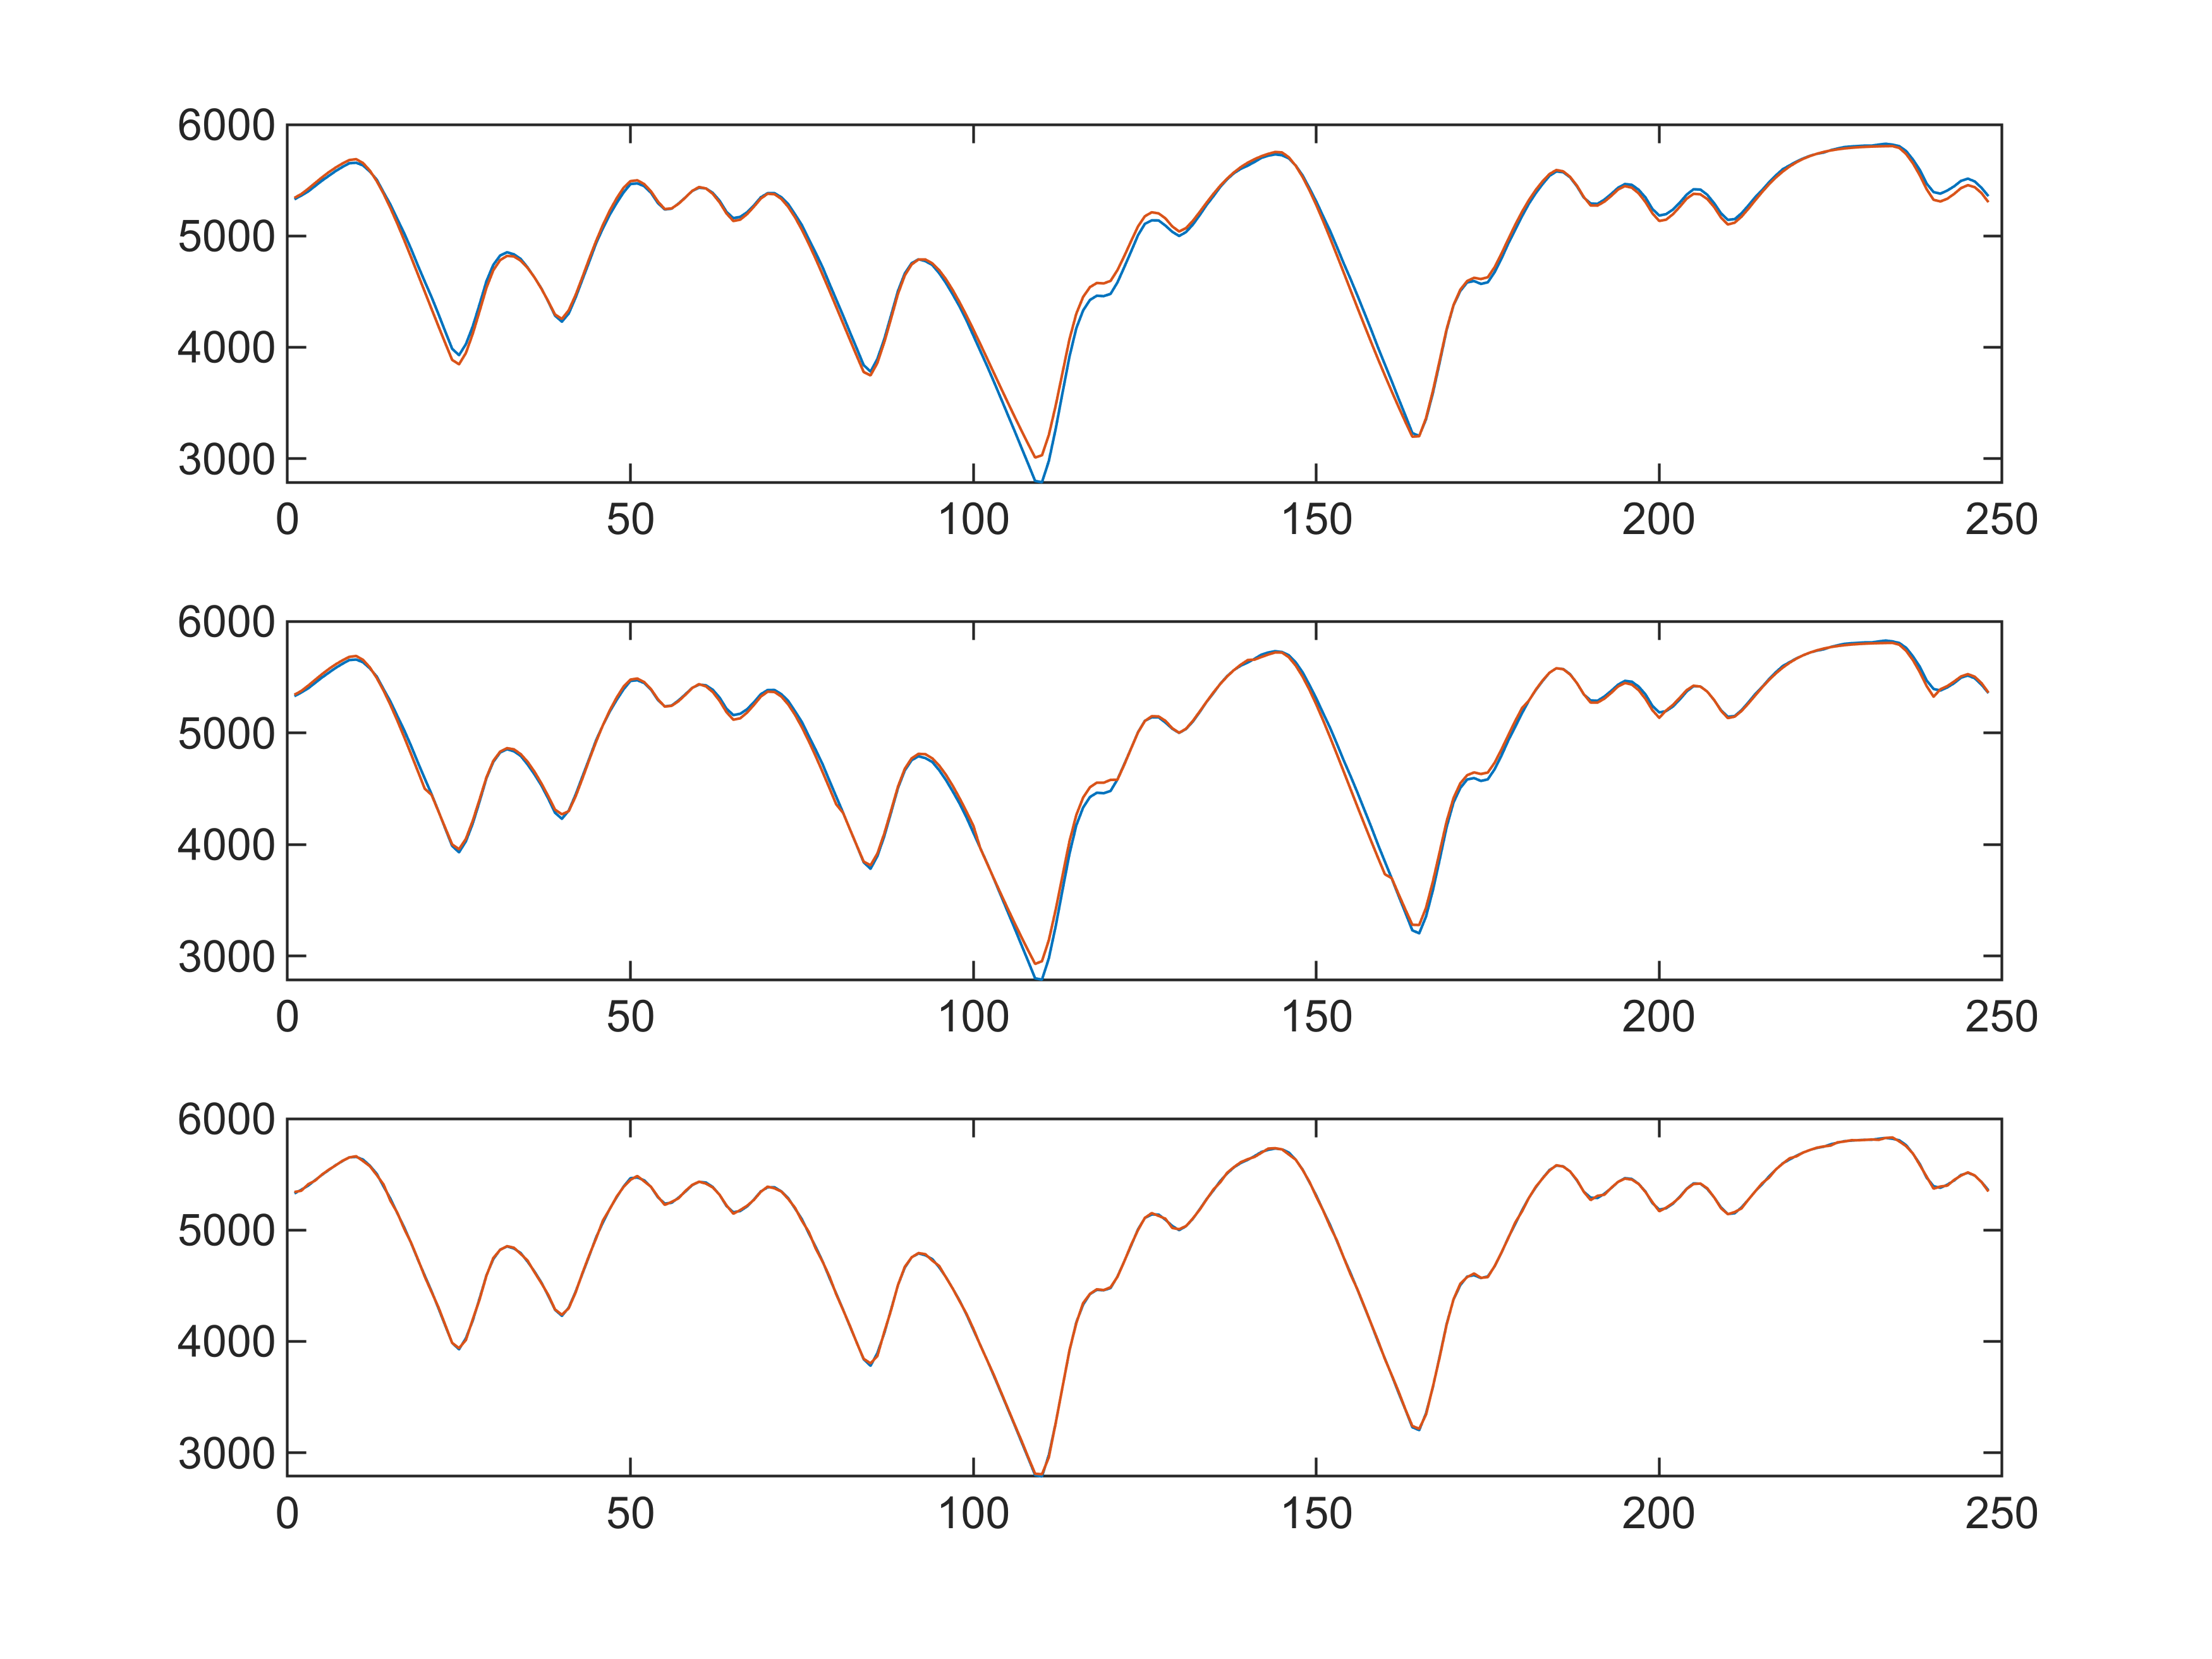

--------------------
MSSE = 3601.6419
MSkPE = 2017.5142
MSPE = 66.0511
--------------------

In [1]:
clear;clc
addpath('C:\Users\ae4159\OneDrive - Coventry University\PhD project\Matlab files\iFROs_PRESS');
%NARX D1_thresh = 1*10^(0.9);
%ARX D1_thresh = 1e-10;
%% Import data

u = readmatrix(...
    'C:\Users\ae4159\OneDrive - Coventry University\PhD project\Matlab files\iFROs_PRESS\Example\Electro-mecahnical system\x_cc.csv');
y = readmatrix(...
    'C:\Users\ae4159\OneDrive - Coventry University\PhD project\Matlab files\iFROs_PRESS\Example\Electro-mecahnical system\y_cc.csv');

%--- Down sample data ---%
dwn_smpl = 100;
u = u(1:dwn_smpl:end);
y = y(1:dwn_smpl:end);
%% System Identification
tt_splt = 100:350; %Training data %1:10000;%500:1000;
u_ID=u(tt_splt);
y_ID=y(tt_splt);

na1=1;na2=3;%Set the maximum lags
nb1=1;nb2=3;%15%
nl_ord_max=2;%Set maximum order of noninearity
is_bias=0;%Set if a bias/DC offset is required
n_inpts=1;inpt0=ones(1,n_inpts).*0;
RMO=3;
sim=[1,1];
displ=0;

tic
[model, Mod_Val_dat, iFRO_table_lin, iFRO_table_nl, best_mod_ind_lin, best_mod_ind_nl, val_stats]...
    = sys_ID_NARX(u_ID,y_ID,na1,na2,nb1,nb2,nl_ord_max,is_bias,displ,sim,n_inpts,inpt0,RMO);

In [2]:
toc

Elapsed time is 38.606243 seconds.

In [3]:

disp('ARX model:'); disp(iFRO_table_lin{best_mod_ind_lin,1});

ARX model:
                  ERR         theta 
               __________    _______
    y1(t-1)     0.0035628     2.4274
    y1(t-2)    0.00010674    -1.9559
    y1(t-3)        0.9963    0.52645
    u1(t-1)    1.3124e-05     10.668
    u1(t-3)    3.8288e-06    -6.8021

In [4]:
disp('NARX model:'); tbl_NARX = join(iFRO_table_nl{best_mod_ind_nl,10},...
    iFRO_table_nl{best_mod_ind_nl,1});disp(tbl_NARX);

NARX model:
                      MS_PRESS_E      theta         ERR    
                      __________    _________    __________
    y1(t-1)               8128.5       1.7844       0.49526
    y1(t-2)               975.85     -0.79156    0.00028497
    u1(t-1)               318.88       47.205    2.6363e-05
    y1(t-2)u1(t-1)        158.23    -0.037612     6.211e-06
    y1(t-3)u1(t-1)    1.2306e+07     0.030086       0.50441
    u1(t-2)u1(t-2)        91.271         1.89    2.5147e-06
    u1(t-2)u1(t-3)        71.842     -0.91694    7.2261e-07

In [5]:
%% Simulate model
[sse, y_hat, error, U_delay_mat_sim] = model_simulation(model,u,y,20);
disp(['RMSE = ',num2str( sqrt(mean(error(:,1).^2)) )]);

RMSE = 177.6604

In [6]:
disp(['Error variance = ',num2str( var(error(:,1)) )]);

Error variance = 26015.6385


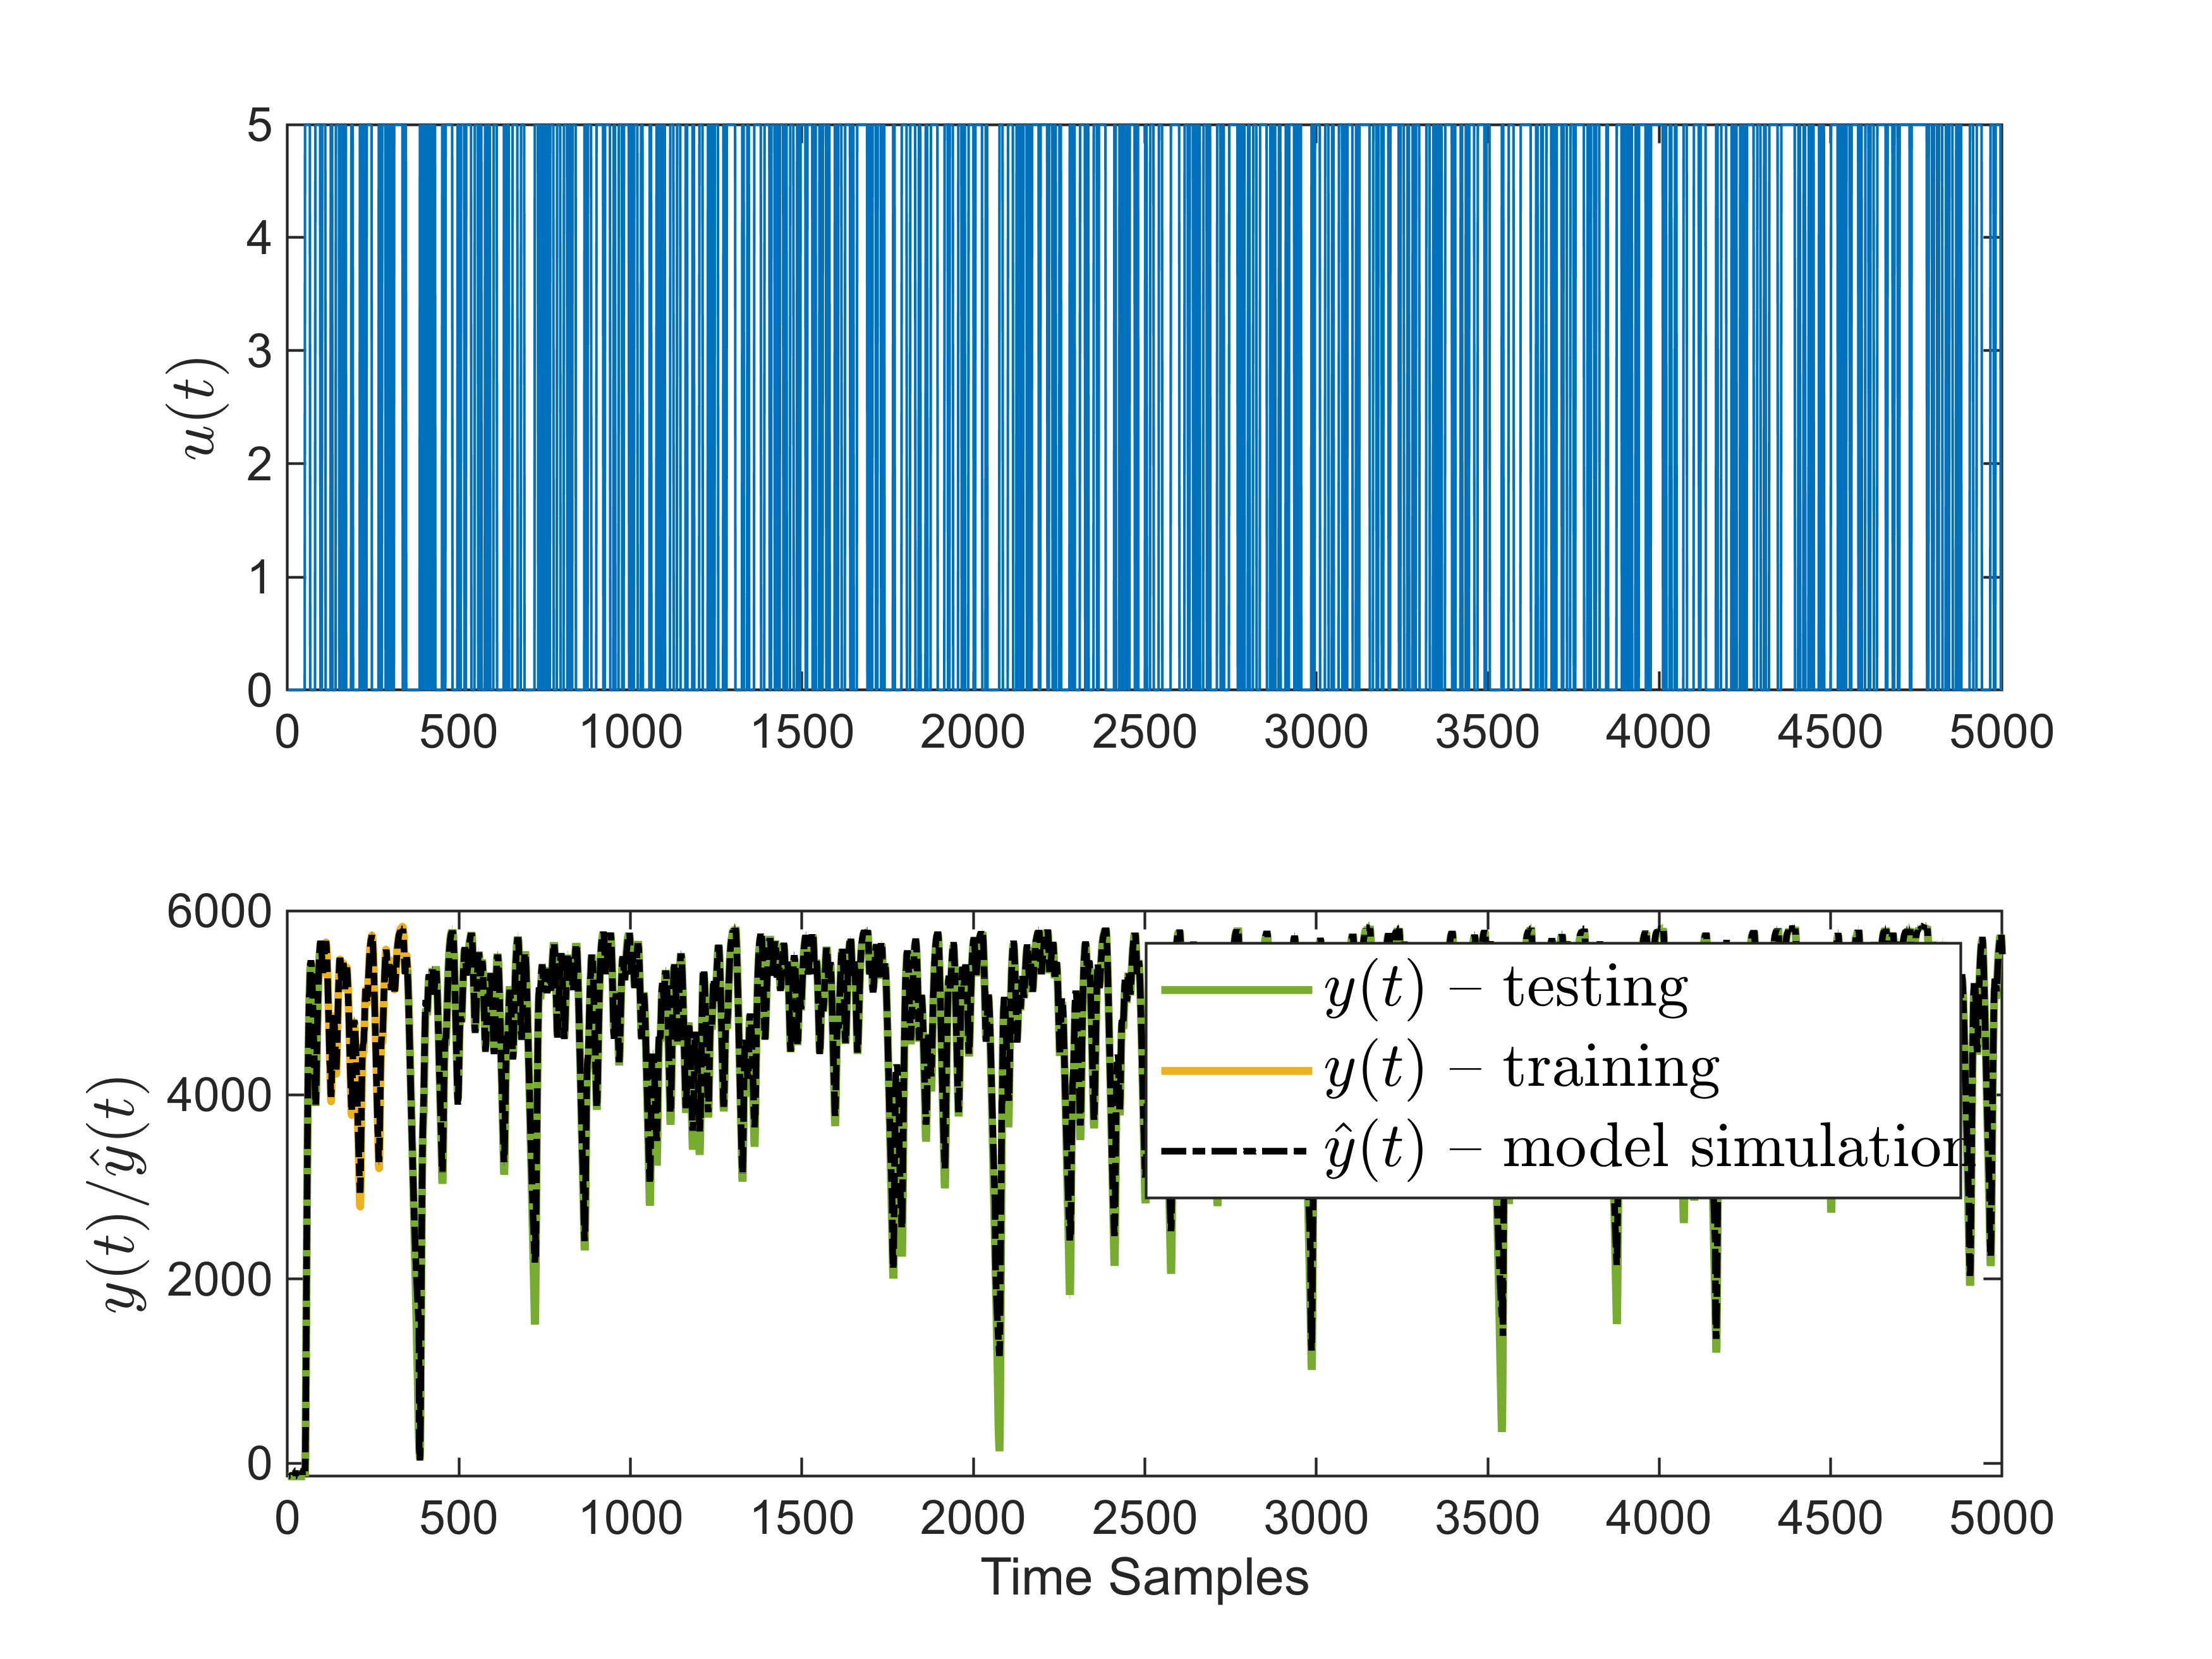

In [7]:

%----------
figure;
subplot(2,1,1); plot(u, 'Color', '#0072BD');
ylabel(' !!!EQ_1!!! ','Interpreter','latex','FontSize',12);
%----------
n = length(y);
subplot(2,1,2);
plot(1:n, y,'Color', '#77AC30', 'LineWidth',1.5); hold on;
plot(tt_splt, y_ID, 'Color', '#EDB120','LineWidth',1.5); hold on;
plot((length(y)-length(y_hat)+1:n), y_hat(:,3), 'k-.', 'LineWidth',1.25);
legend(' !!!EQ_2!!!  -- testing', ' !!!EQ_2!!!  -- training',' !!!EQ_4!!!  -- model simulation','Interpreter','latex','FontSize',12);
xlabel('Time Samples');
ylabel(' !!!EQ_5!!! ','Interpreter','latex','FontSize',12);


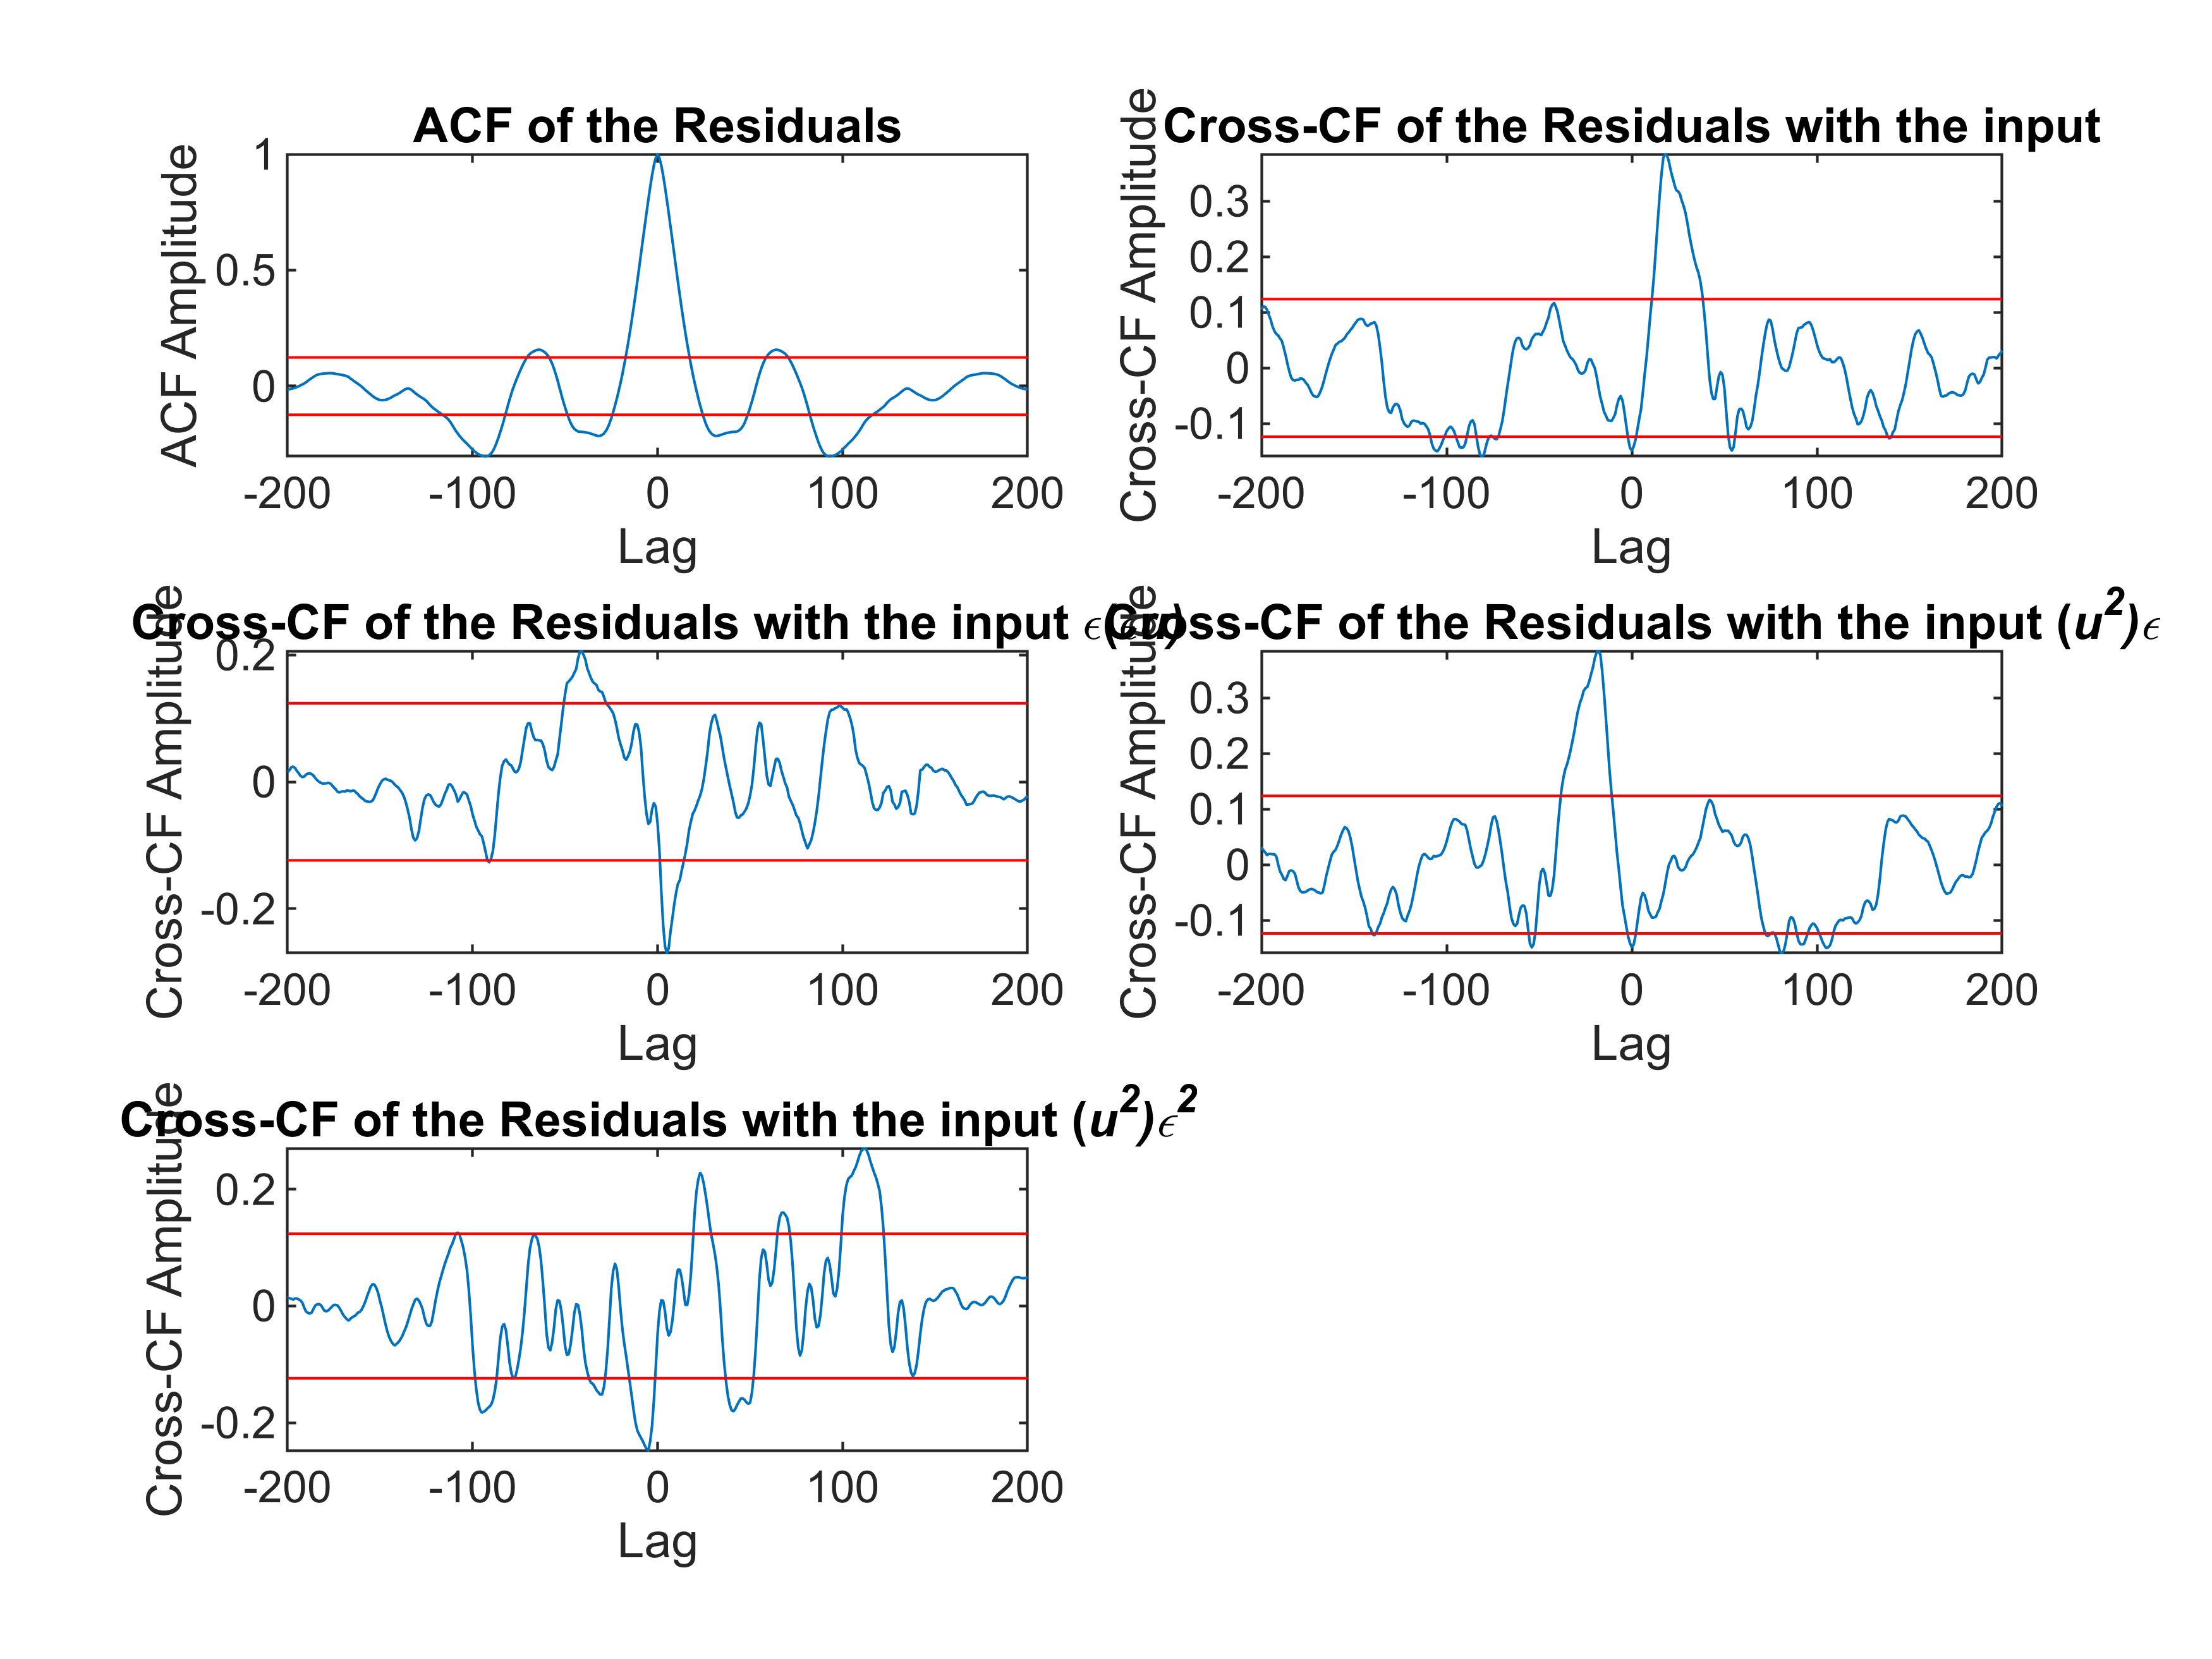

In [8]:
%----------

%% Correlation based statistical validation OSA based
e_ct = error(tt_splt,1);
u_ct = U_delay_mat_sim(tt_splt,1);
u_ct = u_ct - mean(u_ct);
u_ct = u_ct ./ std(u_ct);
e_ct = e_ct - mean(e_ct);
e_ct = e_ct ./ std(e_ct);
[~,~] = ac_cc_model_valid_nl(e_ct,u_ct,200,1);


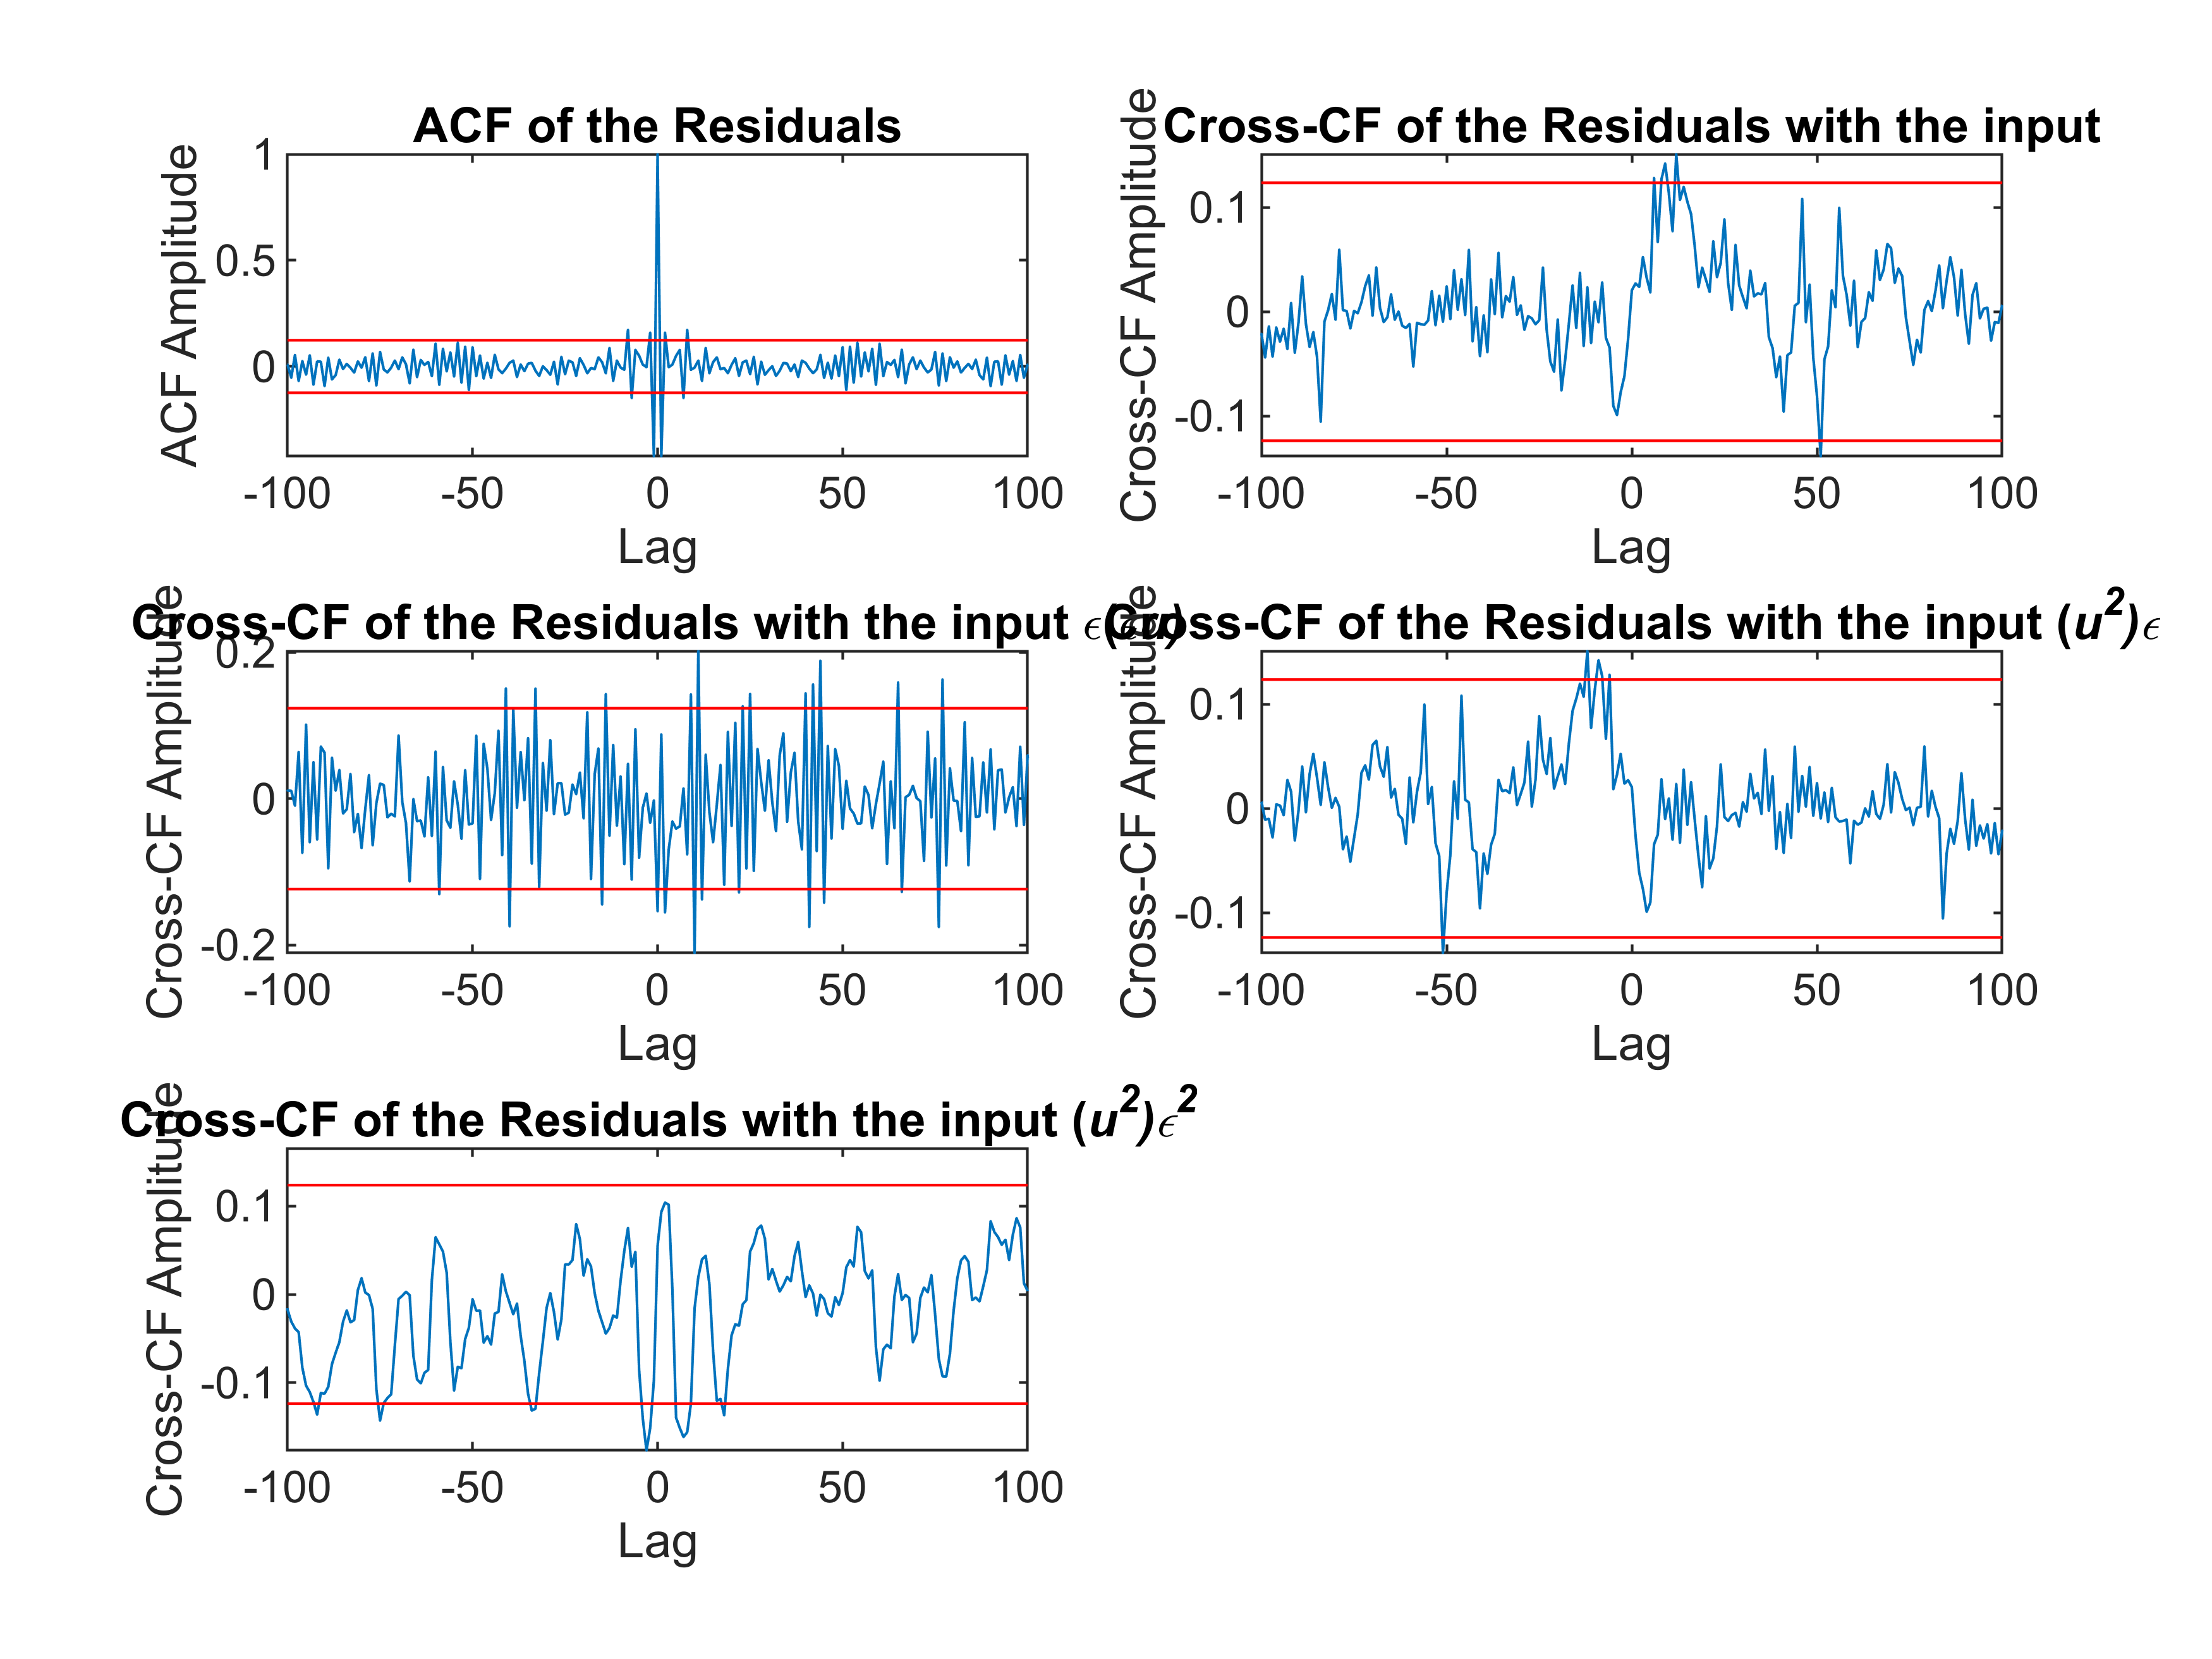

In [9]:

%% Correlation based statistical validation MPO based
e_ct = error(tt_splt,2);
u_ct = U_delay_mat_sim(tt_splt,1);
u_ct = u_ct - mean(u_ct);
u_ct = u_ct ./ std(u_ct);
e_ct = e_ct - mean(e_ct);
e_ct = e_ct ./ std(e_ct);
[~,~] = ac_cc_model_valid_nl(e_ct,u_ct,100,1);